<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

### <center> Анализируем выборку вакансий относящихся к сфере IT.

In [1]:
import pandas as pd
import psycopg2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
import requests
from io import BytesIO

In [2]:
# Создаем соединение с базой данных PostgreSQL  
connection = psycopg2.connect(  
    dbname='project_sql',  
    user='skillfactory',  
    host='84.201.134.129',  
    password='cCkxxLVrDE8EbvjueeMedPKt',  
    port=5432  
)  

# Юнит 3. Предварительный анализ данных

# 3.1

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies).

In [3]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем количество id вакансий и присваеваем алиас
query = f'''SELECT
                COUNT(id) AS Количество_вакансий 
            FROM vacancies
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_1 = pd.DataFrame(result, columns=["Количество_вакансий"]) # Создаем DataFrame из результата  
cur.close() # Закрываем курсор
df_1

,Количество_вакансий
0,49197


**Ответ:**

Общее количество вакансий в базе = 49197

# 3.2

2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [4]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса 

# Считаем количество id работодателей и присваеваем алиас
query = f'''SELECT
                COUNT(id) AS Количество_работодателей
            FROM employers
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_2 = pd.DataFrame(
    result, columns=["Количество_работодателей"]) # Создаем DataFrame из результата  
cur.close() # Закрываем курсор
df_2

,Количество_работодателей
0,23501


**Ответ:**

Общее количество работодателей = 23501

# 3.3

3. Посчитайте с помощью запроса количество регионов (таблица areas).

In [5]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса 

# Считаем количество id городов и присваеваем алиас
query = f'''SELECT
                COUNT(id) AS Количество_городов
            FROM areas
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_3 = pd.DataFrame(result, columns=["Количество_городов"]) # Создаем DataFrame из результата  
cur.close() # Закрываем курсор
df_3

,Количество_городов
0,1362


**Ответ:**

Общее количество регионов = 1362

# 3.4

4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица industries).

In [6]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса 

# Считаем количество id сфер деятельности и присваеваем алиас
query = f'''SELECT
                COUNT(id) AS Количество_сфер_деятельности
            FROM industries
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_4 = pd.DataFrame(
    result, columns=["Количество_сфер_деятельности"]) # Создаем DataFrame из результата  
cur.close() # Закрываем курсор
df_4

,Количество_сфер_деятельности
0,294


**Ответ:**

Общее количество сфер деятельности = 294

***

###### <center> Визуализация по предварительному анализу данных

In [7]:
# Конкатенируем полученые запросы в единый DataFrame

df_unit_total = pd.concat([df_1, df_2, df_3, df_4], axis=1)
df_unit_total

,Количество_вакансий,Количество_работодателей,Количество_городов,Количество_сфер_деятельности
0,49197,23501,1362,294


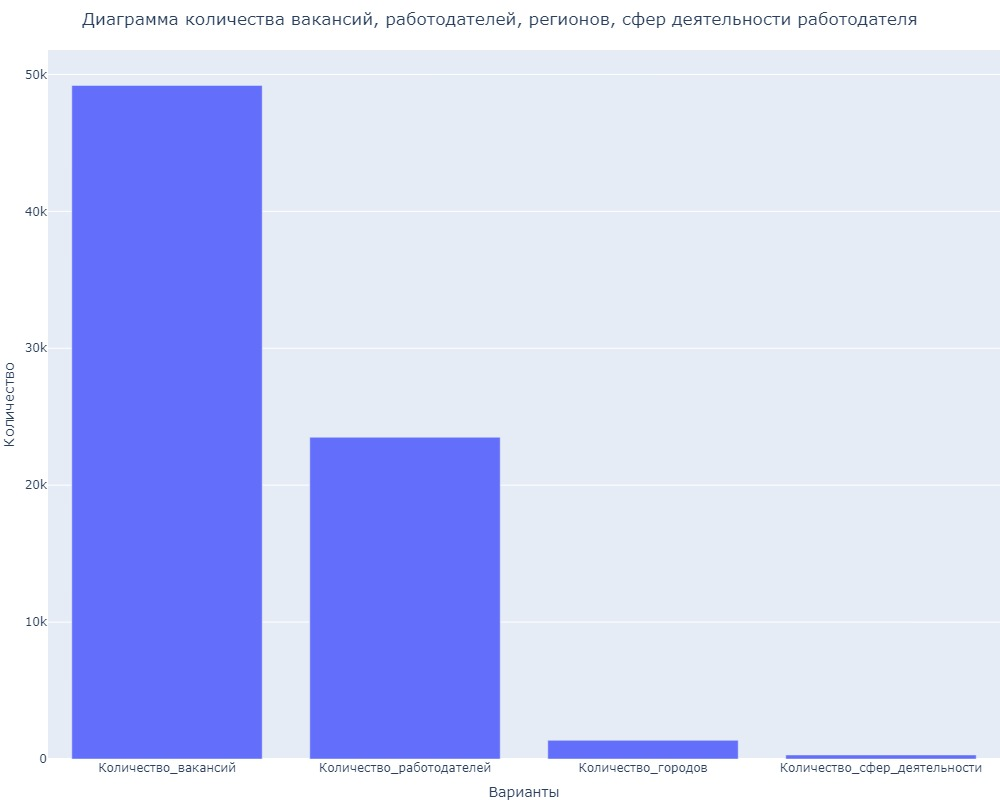

In [8]:
# Создаем столбчатую диаграмму с использованием библиотеки Plotly  
df_unit_3 = df_unit_total.T.reset_index() # Транспонируем DataFrame, чтобы строки стали столбцами
df_unit_3.columns = ['Column', 'Value'] # Переименовываем столбцы
fig = px.bar(df_unit_3, x='Column', y='Value') # Создаем столбчатую диаграмму

fig.update_layout(
    title="Диаграмма количества вакансий, работодателей, регионов, сфер деятельности работодателя",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Варианты",
    yaxis_title="Количество",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0) # Параметры вывода диаграммы
)
#fig.show()

fig.write_image('Plotly/figure_1.jpg') # Сохраняем график в файл    
Image(data='Plotly/figure_1.jpg') # Отображаем график

### <center>Выводы по предварительному анализу данных

В результате предварительного анализа данных, проведенного в рамках проекта, были получены следующие результаты:

* Общее количество вакансий в базе составляет 49,197. Это позволяет нам иметь достаточно большой объем данных для дальнейшего исследования и анализа вакансий.
    

* В базе присутствует 23,501 работодатель. Это означает, что есть значительное количество компаний, которые размещают вакансии в сфере IT, что предоставляет широкий выбор работодателей для потенциальных соискателей.
    

* В базе данных содержится информация о 1,362 регионах. Это позволяет нам рассмотреть разнообразие географических местоположений, в которых предлагаются вакансии в сфере IT.

    
* Общее количество сфер деятельности в базе составляет 294. Это указывает на разнообразие отраслей, в которых требуются специалисты по обработке данных, програмисты, аналитике, системные администраторы и др.
    

**Исходя из полученных данных, можно сделать вывод**, что вакансии представлены в большом количестве, с разнообразием работодателей, географическими локациями и сферами деятельности. Это предоставляет потенциальным соискателям возможность выбора и исследования различных предложений на рынке труда.

# Юнит 4. Детальный анализ вакансий

# 4.1

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [9]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем количество вакансий в городах и присваеваем алиас
query = f'''SELECT
                a.name AS Название_города,
                COUNT(v.area_id) AS Количество_вакансий
            FROM vacancies v
            JOIN areas a ON v.area_id = a.id /*Соединяем таблицы по общему id*/
            GROUP BY a.name /*Группируем по названию города*/
            ORDER BY COUNT(v.area_id) DESC /*Сортируем количество по убыванию*/
            LIMIT 5 /*Выводим первые 5 строк*/
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_5 = pd.DataFrame(
    result, columns=["Название_города", "Количество_вакансий"]) #Создаем DataFrame из результата  
cur.close() # Закрываем курсор
df_5

,Название_города,Количество_вакансий
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892


**Ответ:**

Москва, Санкт-Петербург, Минск, Новосибирск, Алматы.

###### <center>Визуализация "Соотношение вакансий в городах"

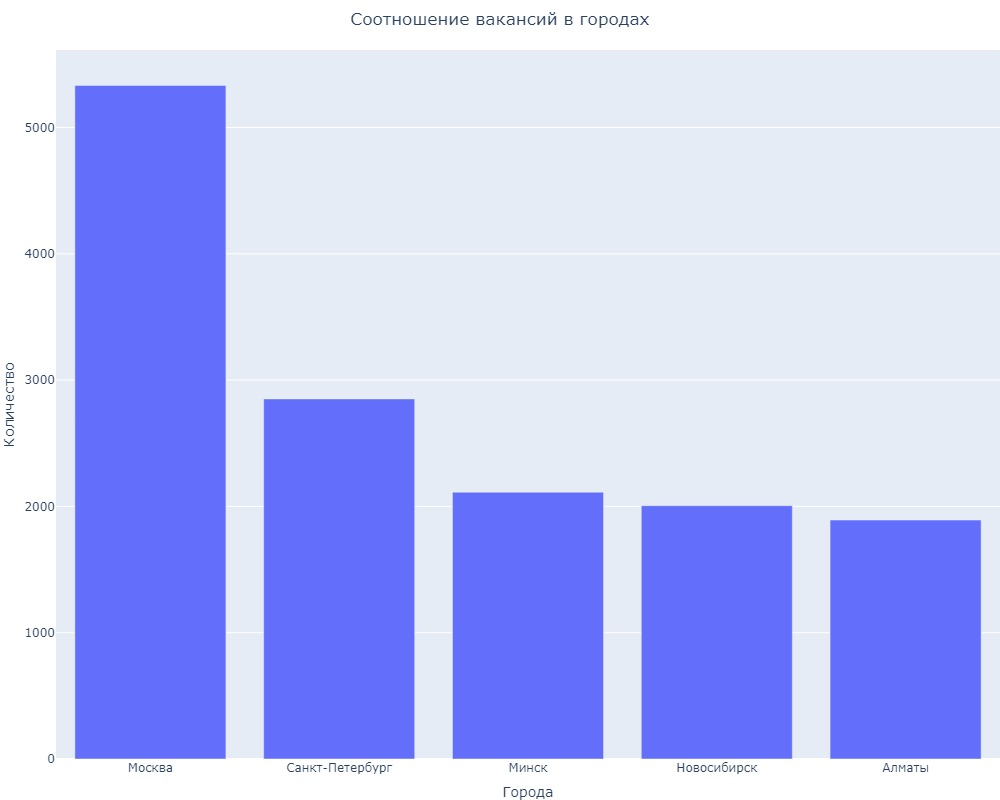

In [10]:
# Создаем столбчатую диаграмму с использованием библиотеки Plotly  
fig = px.bar(df_5, x='Название_города', y='Количество_вакансий') 
fig.update_layout(
    title="Соотношение вакансий в городах",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Города",
    yaxis_title="Количество",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0) # Параметры вывода диаграммы
)
#fig.show()

fig.write_image('Plotly/figure_1.jpg') # Сохраняем график в файл    
Image(data='Plotly/figure_1.jpg') # Отображаем график

# 4.2

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [11]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем количество вакансий с зарплатой и присваеваем алиас
query = f'''SELECT
                COUNT(id) AS Количество_вакансий_с_зарплатой
            FROM vacancies
            WHERE salary_from IS NOT NULL /*Проверяем пустые значений в зарплатах*/
            OR salary_to IS NOT NULL           
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_6 = pd.DataFrame(
    result, columns=["Количество_вакансий_с_зарплатой"]) # Создаем DataFrame из результата  
cur.close() # Закрываем курсор
df_6

,Количество_вакансий_с_зарплатой
0,24073


**Ответ:**

Количество вакансий с хотя бы одним заполненым полем зарплаты = 24073 вакансий.

###### <center>Визуализация "Сравнение общего количества вакансий и вакансий имеющих указанную зарплату"

In [12]:
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем Общее количество вакансий и присваеваем алиас
query = f'''SELECT
                    COUNT(id) AS Общее_количество_вакансий
                FROM vacancies                     
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_6_1 = pd.DataFrame(
    result, columns=["Общее_количество_вакансий"]) # Создаем DataFrame из результата  
cur.close() # Закрываем курсор

In [13]:
# Конкатенируем полученые запросы в единый DataFrame
df_6_total = pd.concat([df_6, df_6_1], axis=1)
df_6_total

,Количество_вакансий_с_зарплатой,Общее_количество_вакансий
0,24073,49197


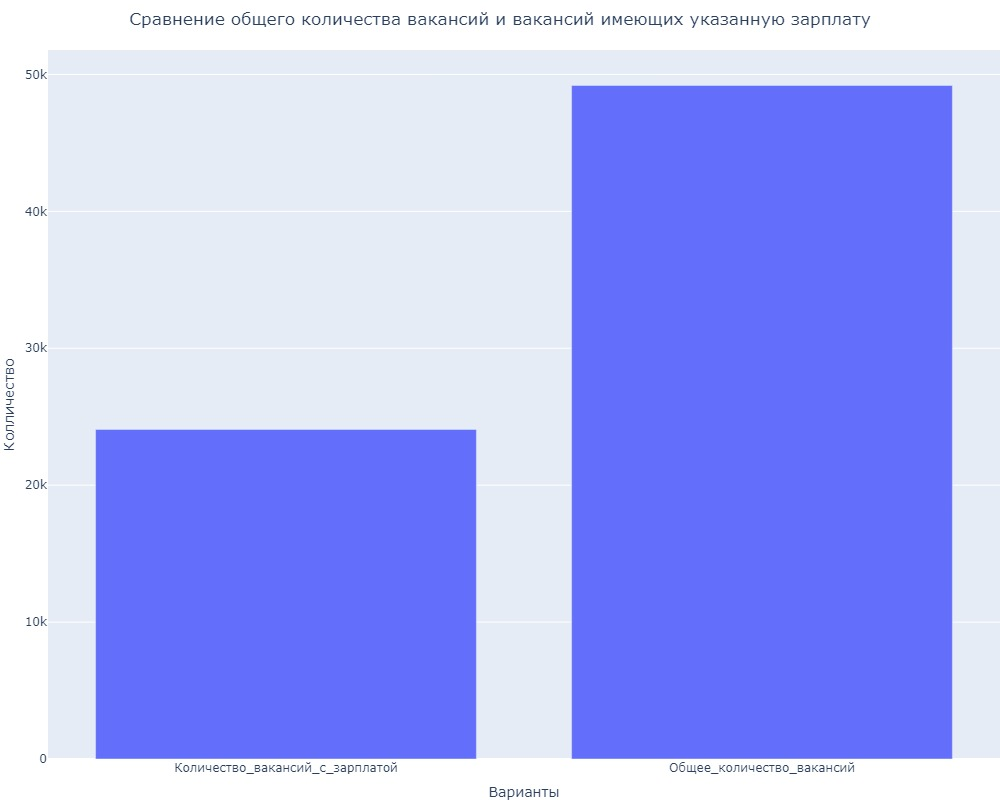

In [14]:
# Создаем столбчатую диаграмму с использованием библиотеки Plotly  
df_unit_4 = df_6_total.T.reset_index() # Транспонируем DataFrame, чтобы строки стали столбцами
df_unit_4.columns = ['Column', 'Value'] # Переименовываем столбцы
fig = px.bar(df_unit_4, x='Column', y='Value') # Создаем столбчатую диаграмму
fig.update_layout(
    title="Сравнение общего количества вакансий и вакансий имеющих указанную зарплату",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Варианты",
    yaxis_title="Колличество",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0) # Параметры вывода диаграммы
)
#fig.show()

fig.write_image('Plotly/figure_1.jpg') # Сохраняем график в файл    
Image(data='Plotly/figure_1.jpg') # Отображаем график

# 4.3

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [15]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем среднии границы зарплаты и присваеваем алиас
query = f'''SELECT
                ROUND(AVG(salary_from)) AS Средняя_зарплата_нижняя_граница,
                ROUND(AVG(salary_to)) AS Средняя_зарплата_верхняя_граница
            FROM vacancies
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_7 = pd.DataFrame(
    result, columns=["Средняя_зарплата_нижняя_граница", "Средняя_зарплата_верхняя_граница"]
                    ) # Создаем DataFrame из результата  
cur.close() # Закрываем курсор
df_7

,Средняя_зарплата_нижняя_граница,Средняя_зарплата_верхняя_граница
0,71065,110537


**Ответ:**

* Cредние значения нижней граници зарплатной вилки = 71065 руб.
* Среднее значение верхней границы зарплатной вилки = 110537 руб.

###### <center>Визуализация "Диаграмма нижней и верхней границ зарплаты"

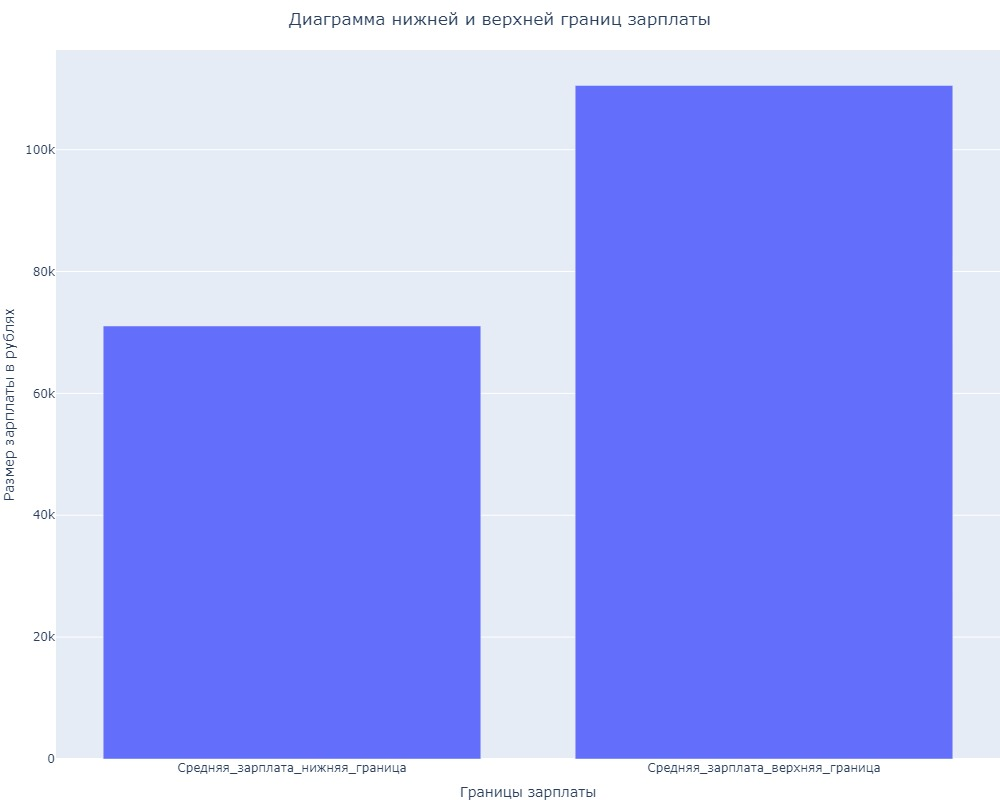

In [16]:
# Создаем столбчатую диаграмму с использованием библиотеки Plotly  
df_7_total = df_7.T.reset_index() # Транспонируем DataFrame, чтобы строки стали столбцами
df_7_total.columns = ['Column', 'Value'] # Переименовываем столбцы
fig = px.bar(df_7_total, x='Column', y='Value') # Создаем столбчатую диаграмму
fig.update_layout(
    title="Диаграмма нижней и верхней границ зарплаты",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Границы зарплаты",
    yaxis_title="Размер зарплаты в рублях",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0) # Параметры вывода диаграммы
)
#fig.show()

fig.write_image('Plotly/figure_1.jpg') # Сохраняем график в файл    
Image(data='Plotly/figure_1.jpg') # Отображаем график

# 4.4

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [17]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем количество вакансий для каждого типа рабочего графика и трудоустройства
query = f'''SELECT
                schedule AS Тип_рабочего_графика,
                employment AS Тип_трудоустройства,
                COUNT(id) AS Количество_вакансий
            FROM vacancies
            GROUP BY schedule, employment /*Группируем по столбцам schedule, employment*/
            ORDER BY COUNT(id) DESC /*Сортируем количество по убыванию*/
            --OFFSET 1 LIMIT 1 /*Удаляем из вывода первую строку и после удаления выводим первую*/
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_8 = pd.DataFrame(
    result, columns=["Тип_рабочего_графика", "Тип_трудоустройства", "Количество_вакансий"]
                    ) # Создаем DataFrame из результата  
cur.close() # Закрываем курсор
df_8

,Тип_рабочего_графика,Тип_трудоустройства,Количество_вакансий
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


**Ответ:**

На втором месте по популярности находится пара: Удалённая работа — Полная занятость (7802 вакансий).

###### Дополнительно

###### <center>Визуализация "Количество вакансий по типам рабочего гафика и типам трудоустройства"

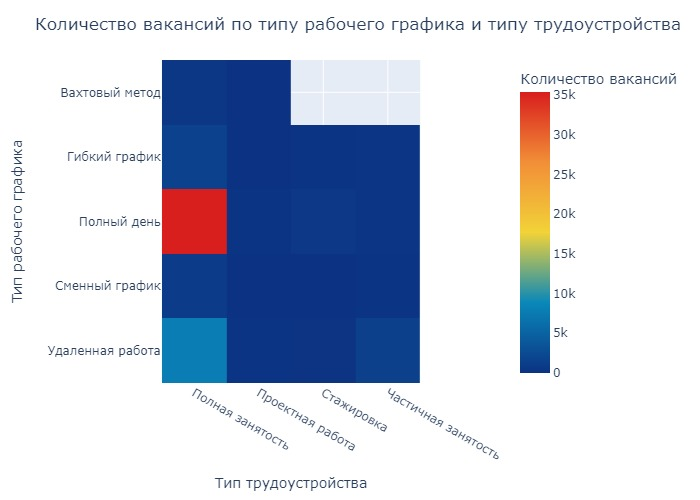

In [18]:
# Создаем тепловую карту с использованием библиотеки Plotly  
fig =px.imshow(df_8.pivot("Тип_рабочего_графика", "Тип_трудоустройства", "Количество_вакансий"), 
                          color_continuous_scale="Portland")  # Строим тепловую карту с указанием цветовой палитры
# Настраиваем внешний вид тепловой карты  
fig.update_xaxes(title="Тип трудоустройства")  
fig.update_yaxes(title="Тип рабочего графика")  
fig.update_layout(  
    title="Количество вакансий по типу рабочего графика и типу трудоустройства",  
    xaxis=dict(tickmode='linear'),  
    yaxis=dict(tickmode='linear'),  
    coloraxis=dict(colorbar=dict(title="Количество вакансий"))  
)  
#fig.show()

fig.write_image('Plotly/figure_1.jpg') # Сохраняем график в файл    
Image(data='Plotly/figure_1.jpg') # Отображаем график

**Вывод:**

Максимальное количество вакансий требуются на полный рабочий день и полную занятость

# 4.5

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [19]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем количество вакансий для каждого типа рабочего графика и трудоустройства
query = f'''SELECT
                experience AS Требуемый_опыт_работы,
                COUNT(experience) AS Количество
            FROM vacancies
            GROUP BY experience /*Группируем по столбцу experience*/
            ORDER BY COUNT(experience) ASC /*Сортируем количество по возрастанию*/
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_9 = pd.DataFrame(
    result, columns=["Требуемый_опыт_работы", "Количество"]) # Создаем DataFrame из результата  
cur.close() # Закрываем курсор
df_9

,Требуемый_опыт_работы,Количество
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


**Ответ:**

Более 6 лет — Нет опыта — От 3 до 6 лет — От 1 года до 3 лет.

###### <center>Визуализация "Количество вакансий и требуемый опыт работы"

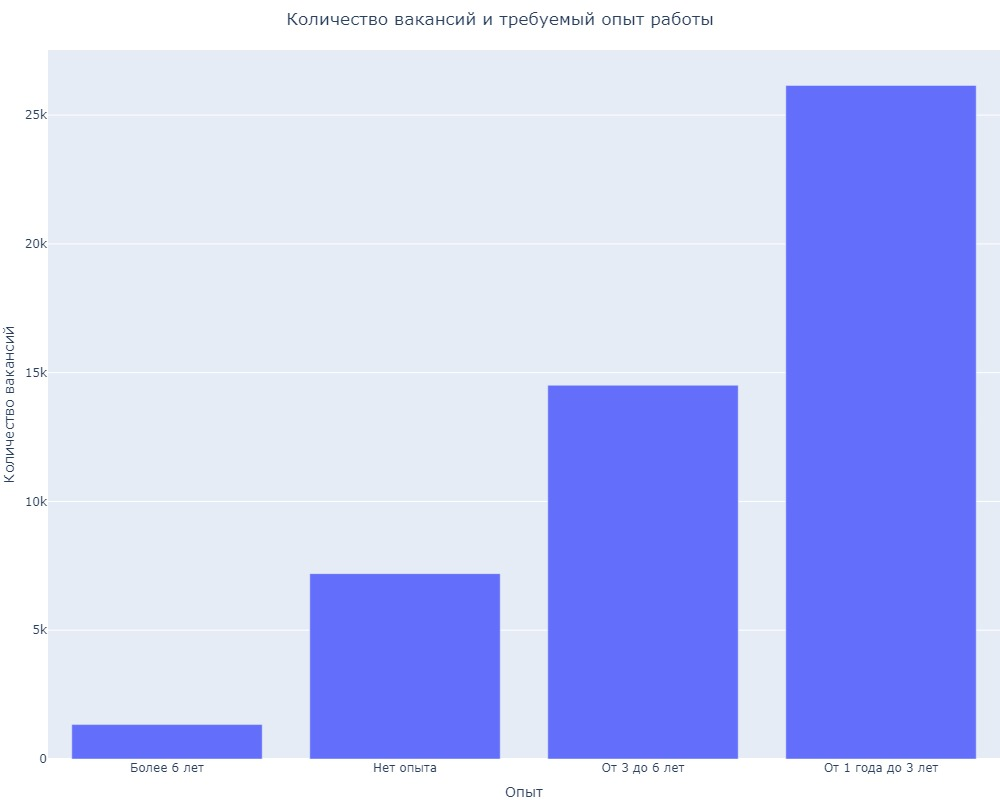

In [20]:
# Создаем столбчатую диаграмму с использованием библиотеки Plotly  
fig = px.bar(df_9, x='Требуемый_опыт_работы', y='Количество') 

fig.update_layout(
    title="Количество вакансий и требуемый опыт работы",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Опыт",
    yaxis_title="Количество вакансий",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0) # Параметры вывода диаграммы
)
#fig.show()

fig.write_image('Plotly/figure_1.jpg') # Сохраняем график в файл    
Image(data='Plotly/figure_1.jpg') # Отображаем график

***

### <center>**Выводы по детальному анализу вакансий**

В результате детального анализа вакансий, проведенного в рамках проекта, были получены следующие результаты:

* Самые популярные регионы с наибольшим количеством вакансий: Москва, Санкт-Петербург, Минск, Новосибирск и Алматы. Эти регионы предлагают наибольшее количество возможностей для соискателей.
    

* Из общего числа вакансий, 24,073 имеют хотя бы одно заполненное поле с указанием зарплаты. Это означает, что около половины вакансий содержат информацию о зарплате.
    

* Среднее значение нижней границы зарплатной вилки составляет около 71,065 рублей, а среднее значение верхней границы - около 110,537 рублей. Эти значения могут служить ориентиром для соискателей при определении ожидаемого уровня заработной платы.
    

* Самыми популярными комбинациями типа рабочего графика и типа трудоустройства являются "Удаленная работа - Полная занятость" с 7,802 вакансиями, а также "Полный день - Полная занятость" с 35,367 вакансиями. Это указывает на востребованность гибкого графика и возможности удаленной работы в данной сфере.
    

* Самые часто требуемые варианты опыта работы в порядке возрастания количества вакансий: "Более 6 лет", "Нет опыта", "От 3 до 6 лет" и "От 1 года до 3 лет". Это дает представление о разнообразии требуемого опыта работы.
    

**Обобщая результаты детального анализа, можно сделать вывод**, что вакансии представлены в различных регионах, включая крупные города, с разнообразными вариантами рабочего графика и требуемого опыта работы. Информация о зарплате доступна для значительной части вакансий. Эти выводы помогут соискателям лучше ориентироваться на рынке труда и принимать более обоснованные решения относительно выбора вакансий и их условий.

# Юнит 5. Анализ работодателей

# 5.1

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [21]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем количество вакансий для каждого типа рабочего графика и трудоустройства
query = f'''WITH num_rows AS ( /*создаем временную таблицу*/
            SELECT
                e.name AS Наименование_работодателя,
                COUNT(v.id) AS Количество_вакансий,
                ROW_NUMBER() OVER (ORDER BY COUNT(v.id) DESC
                ) AS Порядковый_номер /*Присваиваем уникальный номер строки*/
            FROM employers e
            JOIN vacancies v ON v.employer_id = e.id /*соединяем таблици*/
            GROUP BY e.name
            )
            SELECT *
            FROM num_rows
            --WHERE Порядковый_номер IN (1, 5) /*Выводим 1 и 5 строку*/
            WHERE Порядковый_номер BETWEEN 1 AND 30
            ORDER BY Порядковый_номер DESC
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_10 = pd.DataFrame(
    result, columns=[
        "Наименование_работодателя", 
        "Количество_вакансий", 
        "Порядковый_номер"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
print(df_10.to_string(index=False)) # Скрываем индекс при выводе на экран

 Наименование_работодателя  Количество_вакансий  Порядковый_номер
ЭФКО, Управляющая компания                   91                30
                  ИнфоТеКС                   92                29
            Банк ВТБ (ПАО)                   94                28
  Центр Высоких Технологий                   96                27
                Совкомбанк                   99                26
                   МегаФон                  104                25
                  Softline                  108                24
   Лига Цифровой Экономики                  110                23
    МАГНИТ, Розничная сеть                  114                22
                     ЛАНИТ                  117                21
                     ANCOR                  118                20
           Bell Integrator                  121                19
  Иннотех, Группа компаний                  122                18
    Поляков Денис Иванович                  127                17
          

**Ответ:**

На первом и пятом месте по количеству вакансий находятся Яндекс и Газпром нефть.

###### Дополнительно

###### <center>Визуализация "Количество 30 работодателей и их вакансий"

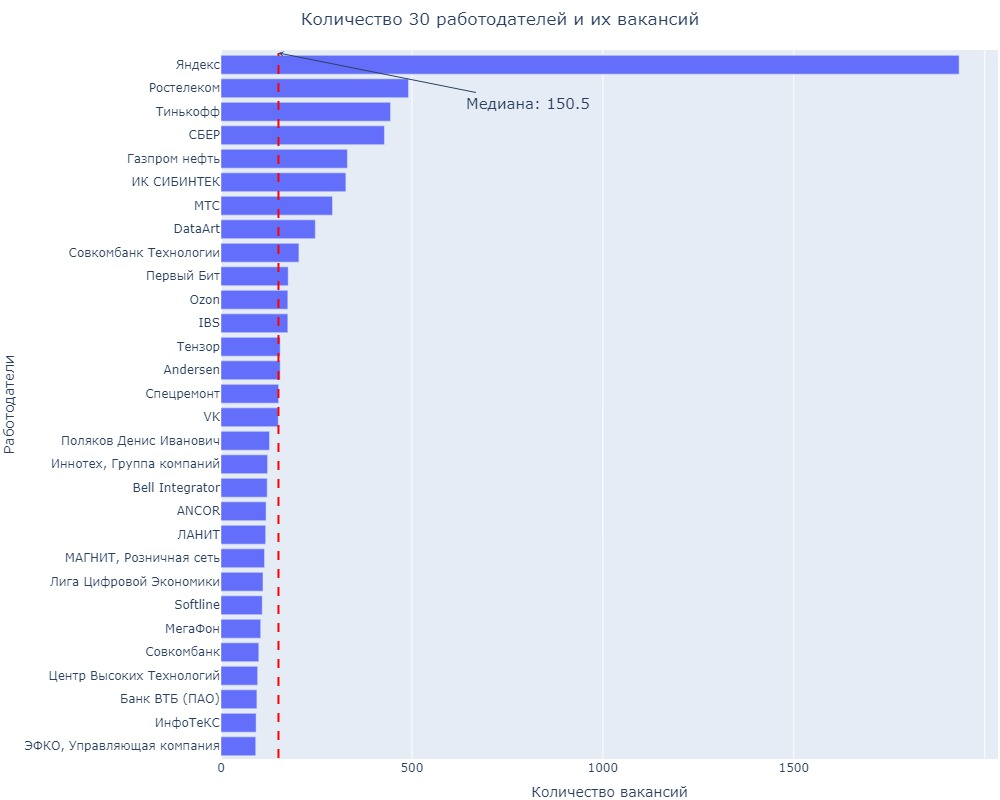

In [22]:
# Создаем столбчатую диаграмму с использованием библиотеки Plotly  
fig = px.bar(df_10, y='Наименование_работодателя', x='Количество_вакансий')  
  
# Добавляем линию медианы  
median = df_10['Количество_вакансий'].median()  
fig.add_shape(  
    type="line",  
    x0=median, y0=-0.5, x1=median, y1=len(df_10['Наименование_работодателя'])-0.5,  
    line=dict(color="red", width=2, dash="dash"),  
    name="Медиана"  
)
# Добавляем аннотацию с числовым значением медианы
fig.add_annotation(  
    x=median, y=len(df_10['Наименование_работодателя'])-0.5,  
    text="Медиана: {}".format(median),  
    showarrow=True,  
    arrowhead=3,  
    ax=250,  
    ay=50,
    font=dict(size=15)
)  
# Параметры вывода диаграммы
fig.update_layout(  
    title="Количество 30 работодателей и их вакансий",  
    title_x=0.5,  
    width=1000,  
    height=800,  
    xaxis_title="Количество вакансий",  
    yaxis_title="Работодатели",  
    legend=dict(x=0, orientation="h"),  
    showlegend=True,  
    margin=dict(l=0, r=0, t=50, b=0)   
)  
#fig.show()

fig.write_image('Plotly/figure_1.jpg') # Сохраняем график в файл    
Image(data='Plotly/figure_1.jpg') # Отображаем график  

# 5.2

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [23]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем количество количество работодателей без вакансий в регионах
query = f'''SELECT
                a.name AS Название_региона,
                COUNT(v.id) AS Количество_вакансий,
                COUNT(a.id) AS Количество_работодателей
            FROM areas a
            LEFT JOIN employers e ON a.id = e.area
            LEFT JOIN vacancies v ON a.id = v.area_id
            WHERE v.id IS NULL
            GROUP BY a.name
            ORDER BY COUNT(a.id) DESC
            LIMIT 5
            
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_11 = pd.DataFrame(
    result, columns=[
        "Название_региона", 
        "Количество_вакансий", 
        'Количество_работодателей']) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_11

,Название_региона,Количество_вакансий,Количество_работодателей
0,Россия,0,410
1,Казахстан,0,207
2,Московская область,0,75
3,Краснодарский край,0,19
4,Беларусь,0,18


**Ответ:**
  
Регион с наибольшим количеством работодателей без вакансий: Россия (410 работодателей).

###### Дополнительно

###### <center>Визуализация "Соотношение количества работодателей без вакансий и 5 регионов"

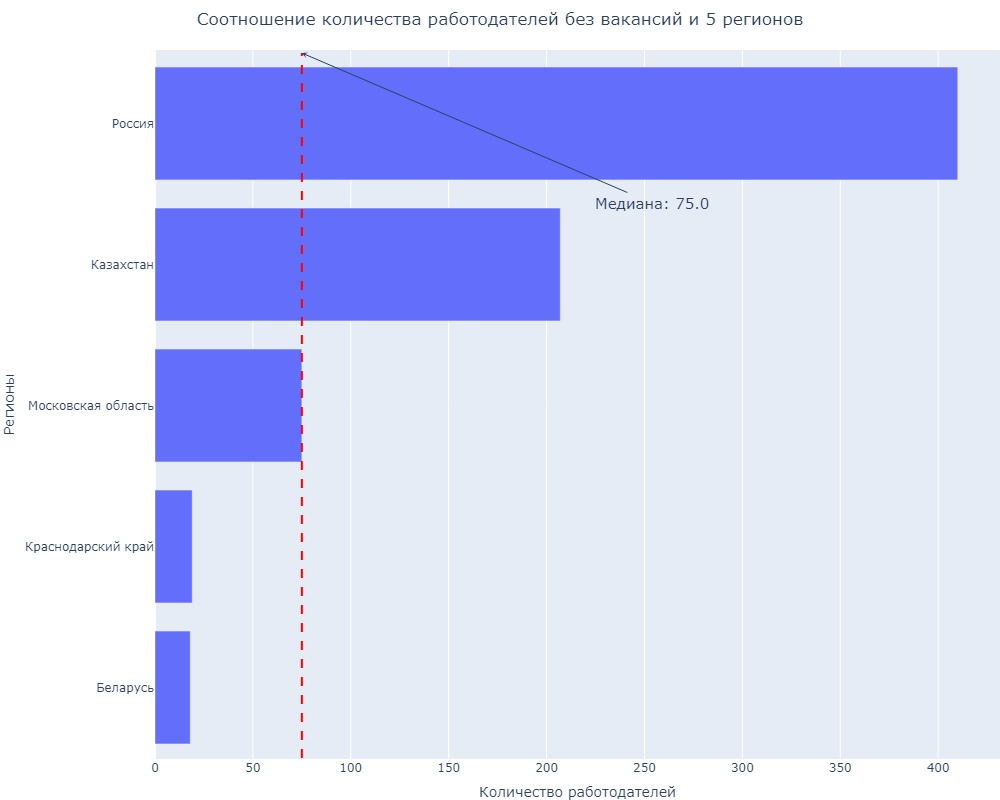

In [24]:
# Создаем столбчатую диаграмму с использованием библиотеки Plotly  
fig = px.bar(df_11[::-1], y='Название_региона', x='Количество_работодателей')  
  
# Добавляем линию медианы  
median = df_11['Количество_работодателей'].median()  
fig.add_shape(  
    type="line",  
    x0=median, y0=-0.5, x1=median, y1=len(df_11['Название_региона'])-0.5,  
    line=dict(color="red", width=2, dash="dash"),  
    name="Медиана"  
)
# Добавляем аннотацию с числовым значением медианы
fig.add_annotation(  
    x=median, y=len(df_11['Название_региона'])-0.5,  
    text="Медиана: {}".format(median),  
    showarrow=True,  
    arrowhead=3,  
    ax=350,  
    ay=150,
    font=dict(size=15)
)  
# Параметры вывода диаграммы
fig.update_layout(  
    title="Соотношение количества работодателей без вакансий и 5 регионов",  
    title_x=0.5,  
    width=1000,  
    height=800,  
    xaxis_title="Количество работодателей",  
    yaxis_title="Регионы",  
    legend=dict(x=0, orientation="h"),  
    showlegend=True,  
    margin=dict(l=0, r=0, t=50, b=0)   
)  
#fig.show()

fig.write_image('Plotly/figure_1.jpg') # Сохраняем график в файл    
Image(data='Plotly/figure_1.jpg') # Отображаем график  

# 5.3

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.

In [25]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем количество регионов с вакансиями у каждого работодателя
query = f'''SELECT
                e.id AS id_работодателя,
                e.name AS Название_работодателя,
                COUNT(DISTINCT v.area_id) AS Количество__регионов
            FROM employers e
            JOIN vacancies v ON e.id = v.employer_id 
            GROUP BY e.id
            ORDER BY COUNT(DISTINCT v.area_id) DESC
            LIMIT 50
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_12 = pd.DataFrame(
    result, columns=[
        "id_работодателя",
        "Название_работодателя",
        "Количество_регионов"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_12

,id_работодателя,Название_работодателя,Количество_регионов
0,1740,Яндекс,181
1,2748,Ростелеком,152
2,5724811,Спецремонт,116
3,5130287,Поляков Денис Иванович,88
4,3682876,ООО ЕФИН,71
5,7944,Совкомбанк,63
6,3776,МТС,55
7,53797,"ЭФКО, Управляющая компания",49
8,4352,Почта России,48
9,3776815,КРОН,48


**Ответ:**

Максимльное значение вакансий в одном регионе = 181

###### Дополнительно

###### <center>Визуализация "Количество регионов с вакансиями у 50 работодателей"

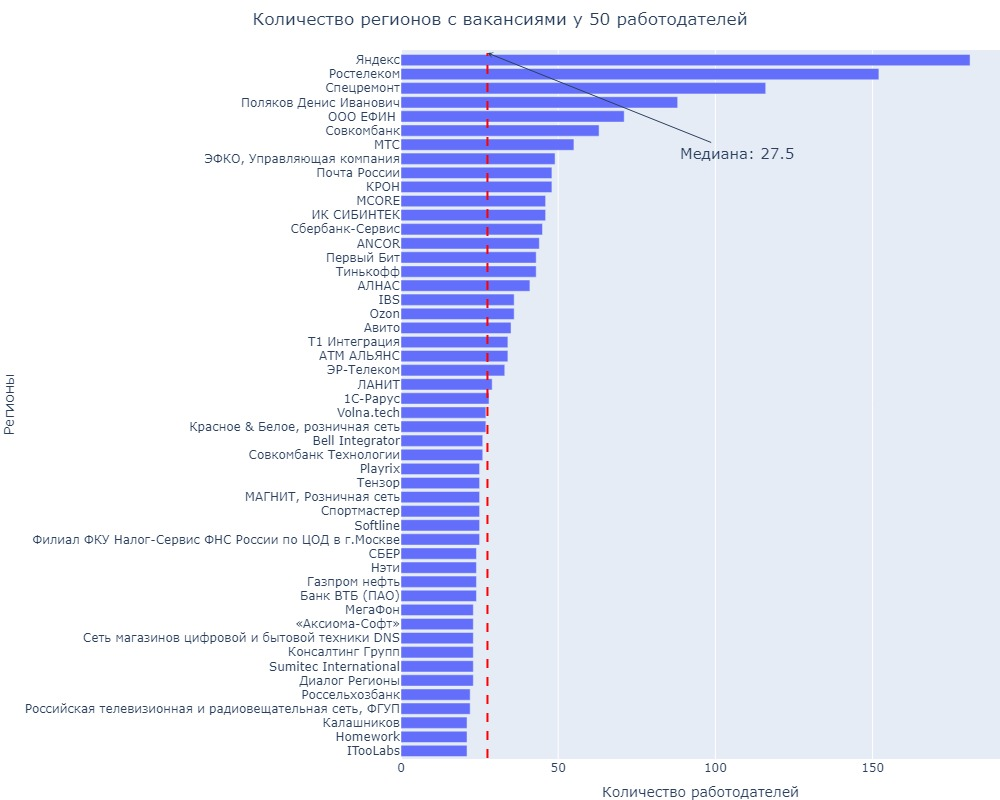

In [26]:
# Создаем столбчатую диаграмму с использованием библиотеки Plotly  
fig = px.bar(df_12[::-1], y='Название_работодателя', x='Количество_регионов')  
  
# Добавляем линию медианы  
median = df_12['Количество_регионов'].median()
fig.add_shape(  
    type="line",  
    x0=median, y0=-0.5, x1=median, y1=len(df_12['Название_работодателя'])-0.5,  
    line=dict(color="red", width=2, dash="dash"),  
    name="Медиана"  
)
# Добавляем аннотацию с числовым значением медианы
fig.add_annotation(  
    x=median, y=len(df_12['Название_работодателя'])-0.5,  
    text="Медиана: {}".format(median),  
    showarrow=True,  
    arrowhead=3,  
    ax=250,  
    ay=100,
    font=dict(size=15)
)  
# Параметры вывода диаграммы
fig.update_layout(  
    title="Количество регионов с вакансиями у 50 работодателей",  
    title_x=0.5,  
    width=1000,  
    height=800,  
    xaxis_title="Количество работодателей",  
    yaxis_title="Регионы",  
    legend=dict(x=0, orientation="h"),  
    showlegend=True,  
    margin=dict(l=0, r=0, t=50, b=0)   
)  
#fig.show()

fig.write_image('Plotly/figure_1.jpg') # Сохраняем график в файл    
Image(data='Plotly/figure_1.jpg') # Отображаем график  

##### **Вывод:**

* Лидеры по количеству регионов с размещенными вакансиями: Яндекс, Ростелеком, Спецремонт.
* Большая часть работодателей размещают вакансии в диапазоне от 1 до 50 регионов.

# 5.4

4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [27]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Считаем количество работодателей, у которых не указана сфера деятельности
query = f'''SELECT
                ei.industry_id AS id_Сферы_деятельности,
                COUNT(DISTINCT e.id) AS Количество_работадателей
            FROM EMPLOYERS e
                LEFT JOIN EMPLOYERS_INDUSTRIES ei ON e.id = ei.employer_id
                WHERE ei.industry_id IS NULL
                GROUP BY ei.industry_id           
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_13 = pd.DataFrame(
    result, columns=["id_Сферы_деятельности", "Количество_работадателей"]
                    ) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_13

,id_Сферы_деятельности,Количество_работадателей
0,None,8419


**Ответ:**

Количества работодателей, у которых не указана сфера деятельности = 8419

# 5.5

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [28]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Запрос
query = f'''SELECT
                e.name AS Название_компании,
                COUNT(ei.industry_id) AS Количество_сфер_деятельности
            FROM employers e
                JOIN employers_industries ei ON e.id = ei.employer_id
                GROUP BY e.name
                HAVING COUNT(ei.industry_id) = 4
                ORDER BY e.name ASC
                OFFSET 2 LIMIT 1
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_14 = pd.DataFrame(
    result, columns=[
        "Название_компании",
        "Количество_сфер_деятельности"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_14

,Название_компании,Количество_сфер_деятельности
0,2ГИС,4


**Ответ:**

Компания находящаяся на третьем месте в алфавитном списке, с четырьмя сферами деятельности: 2ГИС.

# 5.6

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [29]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Запрос
query = f'''SELECT
                COUNT(e.id) as Количество_работодателей
            FROM employers e
            JOIN employers_industries ei ON e.id = ei.employer_id
            JOIN industries i ON i.id = ei.industry_id
            WHERE i.name = 'Разработка программного обеспечения'
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_15 = pd.DataFrame(
    result, columns=["Количество_работодателей"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_15

,Количество_работодателей
0,3553


**Ответ:**

Сфера деятельности: «Разработка программного обеспечения» указана у 3553 компаний.

# 5.7

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [30]:
# Получаем список городов-милионников
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России' 
response = requests.get(url) # Запрос к веб-странице
html_text = response.content.decode('utf-8') # Получение содержимого страницы в виде текста
tables = pd.read_html(BytesIO(html_text.encode())) # Чтение таблицы из текста

city_df = tables[1] # Выбираем таблицу с индексом 1 и сохраняем в DataFrame
city_df

,№,Город,"Население, тыс. чел. (на 1 января 2023 года)","Население, тыс. чел. (итоги переписи 2021 года)[5]",Прирост относительно переписи-2010,"Население, тыс. чел.(итоги переписи 2010 года)[6]"
0,1,Москва,13 098,13 010,"13,1 %",11 504
1,2,Санкт-Петербург,5 598,5 602,"14,8 %",4 880
2,3,Новосибирск,1 635,1 634,"10,9 %",1 474
3,4,Екатеринбург,1 539,1 544,"14,4 %",1 350
4,5,Казань,1 315,1 309,"14,4 %",1 144
5,6,Нижний Новгород,1 213,1 226,NaN,1 251
6,7,Красноярск,1 197,1 188,"21,6 %",977
7,8,Челябинск,1 183,1 190,"5,3 %",1 130
8,9,Самара,1 164,1 173,"0,3 %",1 169
9,10,Уфа,1 158,1 145,"7,8 %",1 062


In [31]:
# текст запроса
city_tuple = tuple(city_df['Город'].to_list()) # Добавляем столбец с городами в картеж
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Запрос
query = f'''(SELECT
                a.name AS Название_города,
                COUNT(v.id) AS Количество_вакансий
            FROM vacancies v
                JOIN areas a ON a.id = v.area_id
                JOIN employers e ON e.id = v.employer_id
                WHERE e.name = 'Яндекс' /*Выбираем из выборки только Яндекс*/
                AND a.name IN {city_tuple} /*Проверяем совпадение с названиями городов указанных в кортеже city_tuple*/
                GROUP BY a.name
                ORDER BY COUNT(v.id) ASC
                )
            UNION ALL /*Соединяем таблици по вертикали*/
            (SELECT
                'Total', /*Создаем строку с общим количеством вакансий*/
                COUNT(*)
            FROM vacancies v
                JOIN employers e ON e.id = v.employer_id
                JOIN areas a ON a.id = v.area_id
                 WHERE e.name = 'Яндекс' AND a.name IN {city_tuple}
                )
'''
cur.execute(query) # Выполняем запрос  
result = cur.fetchall() # Извлекаем все строки результата
  
# Проверяем наличие результатов  
if result:  
    df_16 = pd.DataFrame(result, columns=["Название_города", "Количество_вакансий"]
                        ) # Создаем DataFrame из результата   
else:  
    df_16 = pd.DataFrame(columns=["Название_города", "Количество_вакансий"]
                        ) # Создаем пустой DataFrame 
cur.close() # Закрываем курсор
df_16

,Название_города,Количество_вакансий
0,Total,485
1,Омск,21
2,Челябинск,22
3,Красноярск,23
4,Волгоград,24
5,Пермь,25
6,Казань,25
7,Ростов-на-Дону,25
8,Уфа,26
9,Самара,26


**Ответ:**

Компания Яндекс размещает вакансии в 16 городах-миллионниках, общее количество вакансий = 485.

###### <center>Визуализация "Регионы присутствия компании Яндекс"

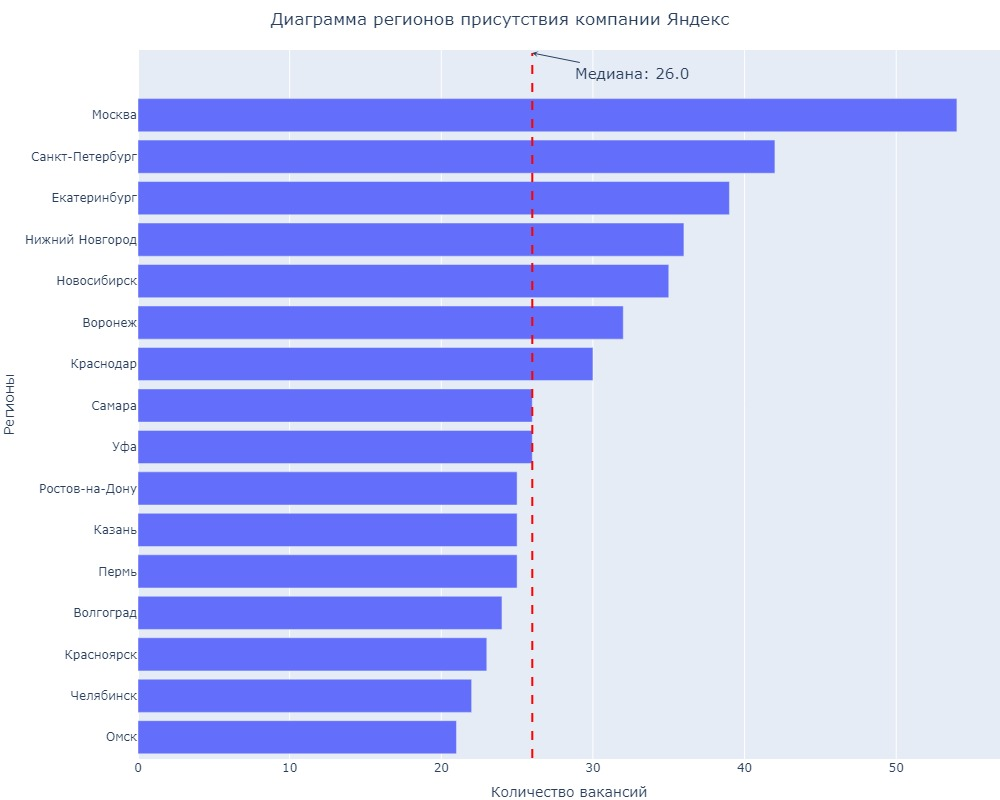

In [32]:
# Создаем столбчатую диаграмму с использованием библиотеки Plotly  
fig = px.bar(df_16[1:], y='Название_города', x='Количество_вакансий')  
  
# Добавляем линию медианы  
median = df_16['Количество_вакансий'].median()
fig.add_shape(  
    type="line",  
    x0=median, y0=-0.5, x1=median, y1=len(df_16['Название_города'])-0.5,  
    line=dict(color="red", width=2, dash="dash"),  
    name="Медиана"  
)
# Добавляем аннотацию с числовым значением медианы
fig.add_annotation(  
    x=median, y=len(df_16['Название_города'])-0.5,  
    text="Медиана: {}".format(median),  
    showarrow=True,  
    arrowhead=3,  
    ax=100,  
    ay=20,
    font=dict(size=15)
)  
# Параметры вывода диаграммы
fig.update_layout(  
    title="Диаграмма регионов присутствия компании Яндекс",  
    title_x=0.5,  
    width=1000,  
    height=800,  
    xaxis_title="Количество вакансий",  
    yaxis_title="Регионы",  
    legend=dict(x=0, orientation="h"),  
    showlegend=True,  
    margin=dict(l=0, r=0, t=50, b=0)   
)  
#fig.show()

fig.write_image('Plotly/figure_1.jpg') # Сохраняем график в файл    
Image(data='Plotly/figure_1.jpg') # Отображаем график  

***

### <center>Выводы по анализу работодателей

В результате анализа работодателей в рамках проекта, были получены следующие результаты:

* ндекс и Газпром нефть находятся на первом и пятом месте соответственно по количеству вакансий. Эти компании предлагают значительное количество возможностей для соискателей.
    

* В таких регионах как Россия, Казахстан, Московская область, Краснодарский край и Беларусь нет вакансий, но в России наибольшее количество работодателей без вакансий (410 компаний).
    

* Максимальное количество вакансий в одном регионе у компании Яндекс и составляет 181.

    
* У 8419 работодателей не указана сфера деятельности.

    
* Компания, находящаяся на третьем месте в алфавитном списке компаний с четырьмя сферами деятельности, - 2ГИС.

    
* 3553 компании указали сферу деятельности "Разработка программного обеспечения".

    
* Компания Яндекс размещает вакансии в 16 городах-миллионниках, общее количество вакансий - 485.

    
**Обобщая результаты анализа работодателей, можно сделать вывод**, что Яндекс и Газпром нефть предлагают большое количество вакансий. Некоторые регионы не имеют вакансий, но в них присутствуют работодатели. Множество работодателей не указали сферу деятельности. Компания Яндекс представлена в нескольких городах-миллионниках с значительным количеством вакансий. Эти результаты могут быть полезны для соискателей, позволяя им выбирать работодателей, которые предлагают наибольшее количество вакансий и представлены в предпочитаемых регионах.

# Юнит 6. Предметный анализ

# 6.1

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [33]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Запрос
query = f'''SELECT
                COUNT(name) AS Количество_вакансий
            FROM vacancies
            WHERE name ILIKE '%data%' 
            OR name ILIKE '%данн%'/*Проверяем вхождение с любым регистром*/
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_17 = pd.DataFrame(
    result, columns=["Количество_вакансий"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_17

,Количество_вакансий
0,1771


**Ответ:**

Вакансий имеющих отношение к данным = 1771

# 6.2

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [34]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Запрос
query = f'''SELECT
                COUNT(name) AS Количество_вакансий
            FROM vacancies
            WHERE (name ILIKE '%data%scientist%' 
            OR name ILIKE '%data%science%'
            OR name ILIKE '%исследователь%данных%'
            OR name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'
            OR name ILIKE '%machine%learning%'
            OR name ILIKE'%машинн%обучен%')
            AND (name ILIKE '%junior%'
            OR experience = 'Нет опыта'
            OR employment = 'Стажировка')
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_18 = pd.DataFrame(
    result, columns=["Количество_вакансий"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_18

,Количество_вакансий
0,51


**Ответ:**

Подходящих вакансий для начинающего Data Science = 51

# 6.3

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или Postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [35]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Запрос
query = f'''SELECT
                COUNT(name) AS Количество_вакансий
            FROM vacancies
            WHERE (name ILIKE '%data%scientist%'
            OR name ILIKE '%data%science%'
            OR name ILIKE '%исследователь%данных%'
            OR name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'
            OR name ILIKE '%machine%learning%'
            OR name ILIKE '%машинн%обучен%')
            AND (key_skills ILIKE '%SQL%' OR key_skills ILIKE '%postgres%')
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_19 = pd.DataFrame(
    result, columns=["Количество_вакансий"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_19

,Количество_вакансий
0,229


**Ответ:**

Вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres = 201.

# 6.4

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [36]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Запрос
query = f'''SELECT
                COUNT(name) AS Количество_вакансий
            FROM vacancies
            WHERE (name ILIKE '%data%scientist%'
            OR name ILIKE '%data%science%'
            OR name ILIKE '%исследователь%данных%'
            OR name LIKE '%ML%' AND name NOT ILIKE '%HTML%'
            OR name ILIKE '%machine%learning%'
            OR name ILIKE '%машинн%обучен%')
            AND key_skills ILIKE '%Python%'
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_20 = pd.DataFrame(
    result, columns=["Количество_вакансий"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_20

,Количество_вакансий
0,351


**Ответ:** 

В качестве ключевого навыка Python указоно в 351 вакансии.

# 6.5

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [37]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Запрос
query = f'''SELECT 
                ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '' )))+1, 2) AS Количество_ключевых_навыков
            FROM vacancies
            WHERE (name ILIKE '%data%scientist%'
            OR name ILIKE '%data%science%'
            OR name ILIKE '%исследователь%данных%'
            OR name LIKE '%ML%' AND name NOT ILIKE '%HTML%'
            OR name ILIKE '%machine%learning%'
            OR name ILIKE '%машинн%обучен%')
            AND (key_skills IS NOT NULL)
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_21 = pd.DataFrame(
    result, columns=["Количество_ключевых_навыков"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_21

,Количество_ключевых_навыков
0,6.41


**Ответ:**

В среднем в вакансиях для DS указывают 6.41 ключевых навыков.

# 6.6

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [38]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Запрос
query = f'''SELECT
                experience AS Тип_требуемого_опыта,
                ROUND(AVG(COALESCE(((salary_from + salary_to)/2), salary_from, salary_to))) AS Средняя_зарплата
            FROM vacancies
            WHERE (name ILIKE '%data%scientist%'
            OR name ILIKE '%data%science%'
            OR name ILIKE '%исследователь%данных%'
            OR name LIKE '%ML%' AND name NOT ILIKE '%HTML%'
            OR name ILIKE '%machine%learning%'
            OR name ILIKE '%машинн%обучен%')
            AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
            AND (experience ILIKE '%от 3 до 6 лет%')
            GROUP BY experience
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_22 = pd.DataFrame(
    result, columns=["Тип_требуемого_опыта", "Средняя_зарплата"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_22

,Тип_требуемого_опыта,Средняя_зарплата
0,От 3 до 6 лет,243115


**Ответ:**

Дата-сайентист с опытом работы от 3 до 6 лет в среднем может рассчитывать на зарплату в 243115 руб.

###### Дополнительно


###### <center>Визуализация "Соотношение требуемого опыта и средней зарплаты"

In [39]:
# текст запроса
cur = connection.cursor() # Создаем курсор для выполнения SQL-запроса

# Запрос
query = f'''SELECT
                experience AS Требуемый_опыт,
                ROUND(AVG(COALESCE(((salary_from + salary_to)/2), salary_from, salary_to))) AS Средняя_зарплата
            FROM vacancies
            WHERE (name ILIKE '%data%scientist%'
            OR name ILIKE '%data%science%'
            OR name ILIKE '%исследователь%данных%'
            OR name LIKE '%ML%' AND name NOT ILIKE '%HTML%'
            OR name ILIKE '%machine%learning%'
            OR name ILIKE '%машинн%обучен%')
            AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
            GROUP BY experience
'''
cur.execute(query) # Выполняем запрос
result = cur.fetchall() # Извлекаем все строки результата
df_23 = pd.DataFrame(
    result, columns=["Требуемый_опыт", "Средняя_зарплата"]) # Создаем DataFrame из результата 
cur.close() # Закрываем курсор
df_23

,Требуемый_опыт,Средняя_зарплата
0,Нет опыта,74643
1,От 1 года до 3 лет,139675
2,От 3 до 6 лет,243115


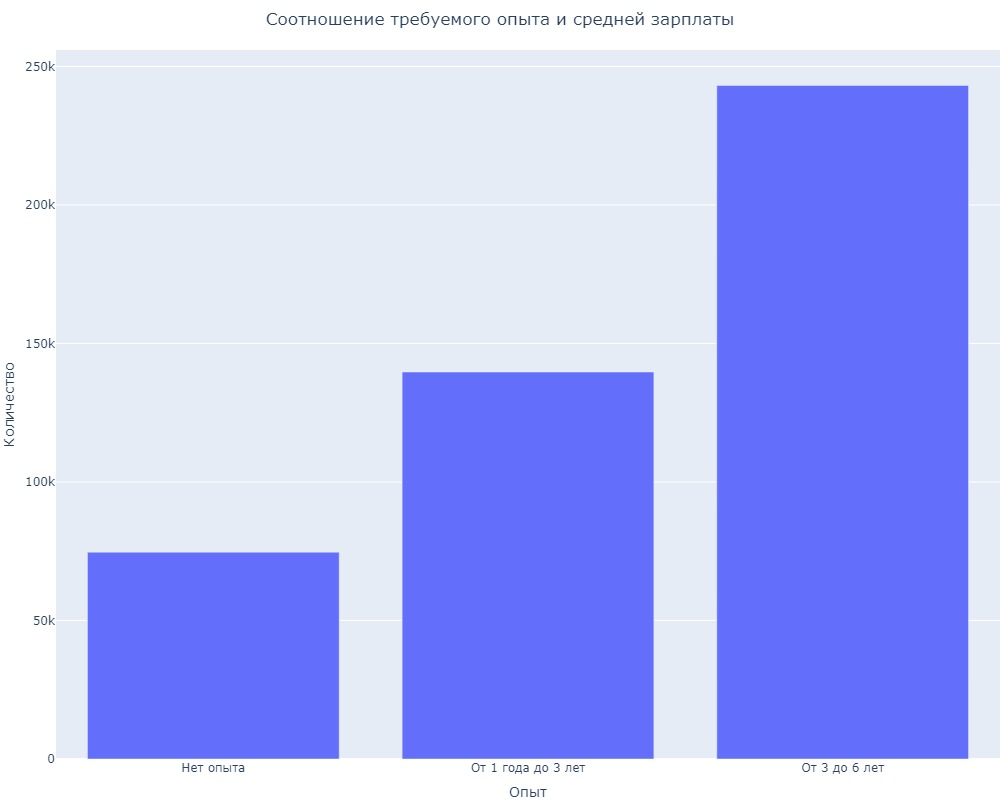

In [40]:
# Создаем столбчатую диаграмму

fig = px.bar(df_23, x='Требуемый_опыт', y='Средняя_зарплата') 

fig.update_layout(
    title="Соотношение требуемого опыта и средней зарплаты",
    title_x = 0.5,
    width=1000,
    height=800,
    xaxis_title="Опыт",
    yaxis_title="Количество",
    legend=dict(x=0, orientation="h"),
    margin=dict(l=0, r=0, t=50, b=0) # Параметры вывода диаграммы
)
#fig.show()

fig.write_image('Plotly/figure_1.jpg')
Image(data = 'Plotly/figure_1.jpg')

***

### <center>Выводы по предметному анализу

В результате предметного анализа вакансий, проведенного в рамках проекта, были получены следующие результаты:

* Вакансии, имеющие отношение к данным, составляют 1771. Это означает, что в данных вакансиях требуется работа с данными или анализ данных.
    

* Для начинающего Data Scientist подходят 51 вакансия. Это предоставляет возможности для соискателей, которые только начинают свою карьеру в области Data science.
    

* Вакансий для Data Scientist, где ключевым навыком указан SQL или Postgres, составляет 201. Знание этих языков запросов является важным требованием для работы с данными в данной области.
    

* Python является популярным требованием работодателей для должности data scientist. В 351 вакансии указывается Python в качестве ключевого навыка.
    

* В среднем в вакансиях для Data Scientist указывают 6.41 ключевых навыка. Это свидетельствует о множестве требований и навыков, которые ожидаются от соискателей данной позиции.
    

* Data Scientist с опытом работы от 3 до 6 лет в среднем может рассчитывать на зарплату в размере 243,115 рублей.
    

**Обобщая результаты предметного анализа, можно сделать вывод**, что на рынке труда существует значительное количество вакансий, связанных с работой с данными. Для начинающих Data Scientist также имеется некоторое количество подходящих вакансий. Навыки работы с SQL и Python являются востребованными для данной должности. Количество ключевых навыков в вакансиях для Data Scientist достаточно высоко, что требует от соискателей разносторонней подготовки. Зарплата для Data Scientist зависит от опыта работы и может быть значительной для специалистов с опытом от 3 до 6 лет. Эти выводы помогут соискателям лучше понять требования рынка труда в области Data Science и принимать информированные решения относительно своей карьеры.


In [41]:
# Закрываем соединение
connection.close()

# Общий вывод по проекту

In [42]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, 
# сделать прогнозы, продумать варианты продолжения исследования

В ходе проведения проекта по анализу вакансий из HeadHunter, были проведены исследования в разделах: предварительный анализ данных, детальный анализ вакансий, анализ работодателей, предметный анализ. Обобщая результаты, можно сделать следующие выводы:

* Раздел предварительный анализ данных, позволил получить общую информацию о количестве вакансий, работодателей, регионов и сфер деятельности. Основные данные: общее количество вакансий в базе - 49,197, работодателей - 23,501, регионов - 1,362, сфер деятельности - 294. Эти цифры отражают масштаб и разнообразие предложений на рынке труда в области Data Science.


* В разделе детальный анализ вакансий, было выявлено, что наибольшее количество вакансий на позицию Data Scientist представлено в Москве, Санкт-Петербурге, Минске, Новосибирске и Алматы. Было также выявлено, что около половины вакансий содержат информацию о зарплате, а самыми популярными сочетаниями типа рабочего графика и типа трудоустройства являются "Удаленная работа - Полная занятость" и "Полный день - Полная занятость". Эти данные могут быть полезны для соискателей, помогая им ориентироваться на рынке труда и принимать информированные решения.


* В разделе анализ работодателей, было выявлено, что компании Яндекс и Газпром нефть предлагают наибольшее количество вакансий на позицию Data Scientist. Также было обнаружено, что в некоторых регионах нет вакансий, но присутствуют работодатели, и у некоторых работодателей не указана сфера деятельности. Эти результаты позволяют соискателям более точно выбирать работодателей и регионы для трудоустройства.


* В разделе предметный анализ, были получены цифры о количестве вакансий, относящихся к данным, подходящих вакансий для начинающих дата-сайентистов, вакансий, требующих навыков SQL или Postgres, вакансий, требующих знания Python, а также среднего количества ключевых навыков в вакансиях для Data Scientist. Было также вычислено среднее значение зарплаты для Data Scientist с опытом работы от 3 до 6 лет. Эти данные позволяют соискателям понять требования рынка труда и ожидаемую зарплату для разных уровней опыта и навыков.


**Обобщая результаты исследования, можно сделать вывод**, что на рынке труда в области Data Science существует значительное количество вакансий с разнообразными требованиями и возможностями. Популярные города для данной должности включают Москву, Санкт-Петербург, Минск, Новосибирск и Алматы. Знание SQL, Python и других ключевых навыков является важным для соискателей, а опыт работы и требования к зарплате различаются в зависимости от уровня опыта. Эти результаты могут помочь соискателям лучше понять требования рынка труда, ориентироваться при поиске работы и принимать информированные решения относительно своей карьеры в области Data Science.

### Идеи для дополнительных исследований

На основе проведенного анализа данных о вакансиях из HeadHunter, можно предложить следующие идеи для дополнительных исследований, прогнозов и возможных вариантов продолжения исследования:

* Прогнозирование роста спроса на специалистов data science: Можно проанализировать данные за предыдущие годы и использовать методы прогнозирования, такие как временные ряды или модели машинного обучения, для определения тенденций и предсказания будущего спроса на специалистов data science. Это может помочь соискателям планировать свою карьеру и определить наиболее перспективные направления.


* Анализ требуемых навыков и их изменения: Исследование изменений в требуемых навыках для должности data scientist со временем может помочь соискателям следить за актуальными тенденциями и понимать, какие навыки стоит развивать. Можно провести анализ данных за разные периоды времени и выявить изменения в требованиях к навыкам и инструментам.


* Кластерный анализ вакансий и работодателей: Используя методы кластерного анализа, можно выделить группы вакансий и работодателей на основе их характеристик и требований. Это позволит лучше понять разнообразие предложений на рынке труда, выявить особенности каждой группы и определить наиболее востребованные профили специалистов и типы компаний.


* Анализ рыночной конкуренции: Исследование конкурентной среды на рынке труда в области data science может помочь соискателям лучше понять ситуацию на рынке и определить свои конкурентные преимущества. Можно провести анализ количества соискателей на одну вакансию, конкуренцию между компаниями и другие факторы, влияющие на конкуренцию на рынке труда.


* Исследование связей между требованиями и зарплатой: Можно провести анализ зависимости между требуемыми навыками, опытом работы и уровнем зарплаты для специалистов. Это позволит определить, какие навыки и опыт наиболее ценны для работодателей и как они отражаются на уровне зарплаты. Такой анализ может помочь соискателям лучше планировать свою карьеру и оценивать свою рыночную стоимость.


* Анализ сфер деятельности и их влияние на требования и зарплату: Исследование сфер деятельности, в которых требуются специалисты data science, и их влияние на требования к навыкам и уровень зарплаты может помочь соискателям определить наиболее перспективные и интересные сферы для развития своей карьеры.


* Варианты продолжения исследования могут включать дальнейший анализ данных с использованием более сложных моделей машинного обучения для прогнозирования или глубинного анализа, а также углубленное изучение конкретных аспектов рынка труда в области анализа данных, таких как специализация, требования к образованию и сертификации, региональные особенности и др.

In [ ]:
# End